# Exploring the Characteristics of Cancelled Flights
### by Jason Kanhai

## Preliminary Wrangling

The data consists of flight arrival and departure details for all commercial flights within the USA for the year of 2008. It provides details on delayed flights, aircraft details, distance and length of flights, cancelled flights and reasons for cancellation. 


By exploring this dataset, I will be focusing on cancelled flights within USA from 2008 and their characteristics that may shed light on which flights are likely to get cancelled. 


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
flights = pd.read_csv('2008.csv')

In [5]:
# Number of columns and rows in dataset
print(flights.shape)

(7009728, 29)


In [6]:
# data types for each variable
print(flights.dtypes)

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object


In [7]:
#variables in the dataframe
flights.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [8]:
#descriptive statistics of numeric variables
print(flights.describe())

            Year         Month    DayofMonth     DayOfWeek       DepTime  \
count  7009728.0  7.009728e+06  7.009728e+06  7.009728e+06  6.873482e+06   
mean      2008.0  6.375130e+00  1.572801e+01  3.924182e+00  1.333830e+03   
std          0.0  3.406737e+00  8.797068e+00  1.988259e+00  4.780689e+02   
min       2008.0  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%       2008.0  3.000000e+00  8.000000e+00  2.000000e+00  9.280000e+02   
50%       2008.0  6.000000e+00  1.600000e+01  4.000000e+00  1.325000e+03   
75%       2008.0  9.000000e+00  2.300000e+01  6.000000e+00  1.728000e+03   
max       2008.0  1.200000e+01  3.100000e+01  7.000000e+00  2.400000e+03   

         CRSDepTime       ArrTime    CRSArrTime     FlightNum  \
count  7.009728e+06  6.858079e+06  7.009728e+06  7.009728e+06   
mean   1.326086e+03  1.481258e+03  1.494801e+03  2.224200e+03   
std    4.642509e+02  5.052251e+02  4.826728e+02  1.961716e+03   
min    0.000000e+00  1.000000e+00  0.000000e+00  1.0000

### What is the structure of your dataset?

> The dataset consists of flight data for 7009728 flights from 2008, some of which are delayed, some are on time and others that are cancelled. Some variables are quantitative (ArrTime, TaxiIn, etc) while others are categorical, both numeric (Day of Week, Day of Month, Cancellation Code) and descriptive (Unique Carrier). Some Variables are ordered (Month, Day of Month , Day of Week) while others are not (Cancellation Code, FlightNum, UniqueCarrier, etc).


### What is/are the main feature(s) of interest in your dataset?

> I'm curious to understand which flights are typically cancelled. Can we predict which flights are most likely to be cancelled given this dataset?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Severeal features of interest will aid in my attempt to understand the characteristics of cancelled flights. These include:

1. Month
2. DayofMonth
3. DayOfWeek
4. CRSElapsedTime
5. Origin
6. Dest
7. Distance
8. Cancelled
9. CancellationCode
10. Distance
11. CRS DepTime

## Univariate Exploration

Firstly I want to look at what percentage of flights are cancelled and create a dataframe of purely cancelled flights. 

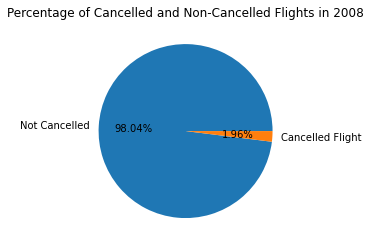

In [9]:
# % of flights Cancelled in 2008
di = {0: 'Not Cancelled', 1 : 'Cancelled Flight'}
flights['Cancelled'].replace(di, inplace = True)
A = flights['Cancelled'].unique()

plt.pie(flights.Cancelled.value_counts(), autopct='%.2f%%', labels = A);
plt.title('Percentage of Cancelled and Non-Cancelled Flights in 2008');

In [10]:
# Number of Cancelled Flights in 2008

print(flights.Cancelled.value_counts())

Not Cancelled       6872294
Cancelled Flight     137434
Name: Cancelled, dtype: int64


As we can see above, Cancelled flights account for only 1.96% of total flights in the USA in 2008. This amount to 137434 flights, a significantly smaller dataset that is more managable to work with. Based on this I will create a subset dataframe that includes ONLY cancelled flights. 

In [11]:
# create new dataframe of ONLY Cancelled Flights
Cancel = flights[flights["Cancelled"] == 'Cancelled Flight']

In [12]:
# Dimensions of Cancelled Flight Dataframe
print(Cancel.shape)

(137434, 29)


Now that I have a dataframe of purely Cancelled Flight I can begin lookinf at their key characteristics. Let me first look at their Scheduled Flight Duration.

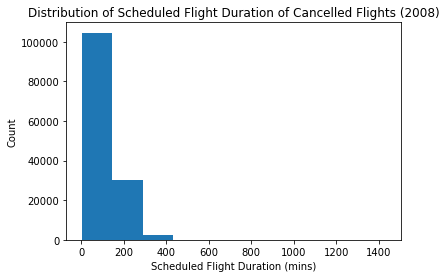

In [13]:
#Distribution of Scheduled Flight Duration of Cancelled Flights
plt.hist(data = Cancel, x = 'CRSElapsedTime')
plt.xlabel('Scheduled Flight Duration (mins)')
plt.ylabel('Count')
plt.title('Distribution of Scheduled Flight Duration of Cancelled Flights (2008)');

The distribution of flight durations is heavily right skewed, however, a logarithmic plot may provide more insight. 

In [14]:
#Statistical spread of Scheduled Flight Duration
Cancel['CRSElapsedTime'].describe()

count    137188.000000
mean        114.554414
std          57.695718
min           1.000000
25%          74.000000
50%         100.000000
75%         140.000000
max        1435.000000
Name: CRSElapsedTime, dtype: float64

In [15]:
# Logarithmic statistical spread of Scheduled Flight Duration 
np.log10(Cancel['CRSElapsedTime'].describe())

count    5.137316
mean     2.059012
std      1.761144
min      0.000000
25%      1.869232
50%      2.000000
75%      2.146128
max      3.156852
Name: CRSElapsedTime, dtype: float64

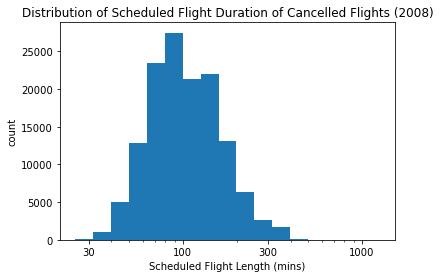

In [16]:
#Logarithmic distribution of Scheduled Flight duration

bins = 10**np.arange(1.4, 3.1 + 0.1, 0.1)
ticks = [30, 100, 300, 1000]
labels = [ '{}'.format(v) for v in ticks]
plt.hist(data = Cancel, x = 'CRSElapsedTime', bins = bins )
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel ('Scheduled Flight Length (mins)')
plt.ylabel ('count');
plt.title('Distribution of Scheduled Flight Duration of Cancelled Flights (2008)');

The logarithmic plot shows a fairly normal distribution of Scheduled flight duration for cancelled flights, with most having an Scheduled length of 80 - 100 minutes. There are very few cancelled flights shorter than 30 minutes and longer than 400 minutes.

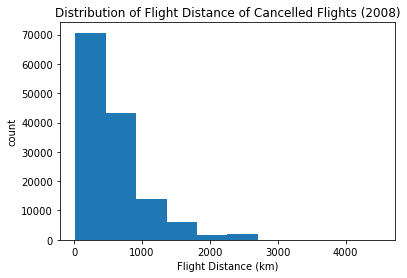

In [17]:
#Distribution of Flight Distance of Cancelled Flights
plt.hist(data = Cancel, x = 'Distance')
plt.xlabel ('Flight Distance (km)')
plt.ylabel ('count');
plt.title('Distribution of Flight Distance of Cancelled Flights (2008)');

The distribution of flight distances is also heavily right skewed and would also benefit from a logarithmic plot.

In [18]:
#Statistical spread of Flight Distance
Cancel['Distance'].describe()

count    137434.000000
mean        581.042842
std         457.886379
min          17.000000
25%         256.000000
50%         448.000000
75%         749.000000
max        4502.000000
Name: Distance, dtype: float64

In [19]:
# Logarithmic statistical spread of Flight Distance
np.log10(Cancel['Distance'].describe())

count    5.138094
mean     2.764208
std      2.660758
min      1.230449
25%      2.408240
50%      2.651278
75%      2.874482
max      3.653405
Name: Distance, dtype: float64

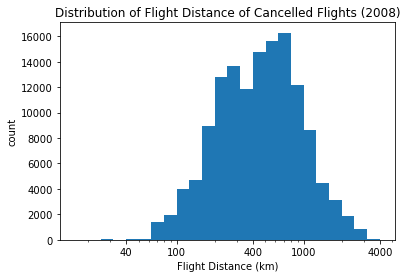

In [20]:
#Logarithmic distribution of  Flight Distances

bins = 10**np.arange(1.2, 3.6 + 0.1, 0.1)
ticks = [40, 100, 400, 1000, 4000]
labels = [ '{}'.format(v) for v in ticks]
plt.hist(data = Cancel, x = 'Distance', bins = bins )
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel ('Flight Distance (km)')
plt.ylabel ('count')
plt.title('Distribution of Flight Distance of Cancelled Flights (2008)');

Logarithmic plot shows a fairly normal distribution of flight distances for cancelled flights, with most having a peak at 400 - 800km. There are very few cancelled flights that cover distances less than 60km or greater than 3000 km.

### Temporal Distribution ###

Now lets look at the temporal distribution of Cancelled Flights in the USA for 2008.

In [21]:
base_colour = sb.color_palette()[3]

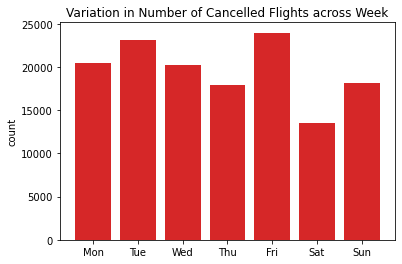

In [22]:
#Distribution of Cancelled Flights across the week.
width = 1
bins = np.arange(1, 9, width)
plt.hist(Cancel.DayOfWeek, rwidth=.8 , bins=bins, color = base_colour)
name_days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(np.arange(1.5,max(bins),width), name_days);
plt.ylabel('count')
plt.title('Variation in Number of Cancelled Flights across Week');

Based on the plot above, we can see that the number of cancelled flights  varies across the week, with most occuring on Fridays and the least occuring on Saturdays.

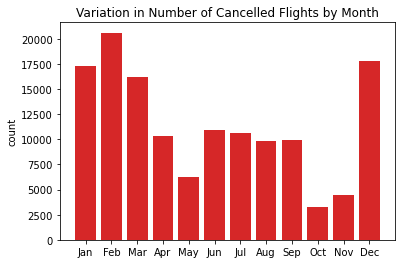

In [23]:
#Distribution of Cancelled Flights across the months of the year.
width = 1
bins = np.arange(1, 14, width)
plt.hist(Cancel.Month, rwidth=.8 , bins=bins, color = base_colour)
months_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(1.5,max(bins),width), months_names)
plt.ylabel('count')
plt.title('Variation in Number of Cancelled Flights by Month');

Most cancelled flights appear to have occured in Februrary with the least occuring in October for the year 2008.

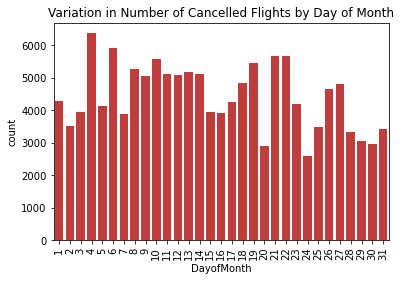

In [24]:
#Distribution of cancelled flights across the days of a month
sb.countplot(data = Cancel, x= 'DayofMonth', color = base_colour);
plt.xticks(rotation=90)
plt.ylabel('count')
plt.title('Variation in Number of Cancelled Flights by Day of Month');

There are no obvious trends for Cancelled flights in 2008 when it comes to days across a month

It should be noted that these are just purely distributions across time and do not represent any measure of the probability of a flight be cancelled based on a day or month. I'll explore that some more in the Bivariate Visualization section.

### Reasons for Cancellation ###

Now I'll explore the various reasons as to why flights are cancelled. 

In [25]:
#Unique Reasons for Cancellation
X = Cancel['CancellationCode'].unique()
print(X)

['A' 'C' 'B' 'D']


In [26]:
# Replace code with Reason from Metadata
CCdi = {'A': 'Carrier', 'B': 'Weather', 'C': 'NAS', 'D': 'Security'}
Cancel['CancellationCode'].replace(CCdi, inplace = True)
X = Cancel['CancellationCode'].unique()
print(X)

['Carrier' 'NAS' 'Weather' 'Security']


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


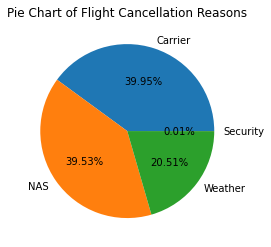

In [27]:
# Pie Chart of Reasons for Cancellation
plt.pie(Cancel.CancellationCode.value_counts(), autopct='%.2f%%', labels = X);
plt.title("Pie Chart of Flight Cancellation Reasons");

From the Pie chart above we can see that most flights Cancelled in 2008 are due to Carrier issues (39.95%), 39.53%  are within the control of the National Airspacce System (NAS), 20.51% are Weather related while only 0.01% are due to Security issues.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>  Give the broad range of values the Scheduled Flight Duration and Flight distance took, along with their initial right skewed distribution, logarithmic transformation was performed on the x-axis which displaued a more unimodal / normal distribution of values. From these findings, it appears most cancelled flights have a duratioin of 80-100 mins, while most also cover distances of 400-800 km. I may use these to further focus my investigation.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> It was interesting to note how the number of cancelled flights varied temporally (across week, days or month and months of the year), but these just give a simple variation, not a probability as was mentioned. I will aim to look at probability in bivariate visualizations. 

## Bivariate Exploration

Now lets look at the temporal distribution of the probabilty of flights being cancelled.

In [28]:
#Restore Cancellation Code
direv = {'Not Cancelled' : 0, 'Cancelled Flight': 1}
flights['Cancelled'].replace(direv, inplace = True)
A = flights['Cancelled'].unique()

In [29]:
# Calculate % chance flight cancellled by day
DOWCancel = (flights.groupby('DayOfWeek').Cancelled.mean()*100).reset_index()
DOWCancel.head(7)

,DayOfWeek,Cancelled
0,1,1.979635
1,2,2.244855
2,3,1.943126
3,4,1.732570
4,5,2.314798
5,6,1.582091
6,7,1.856714


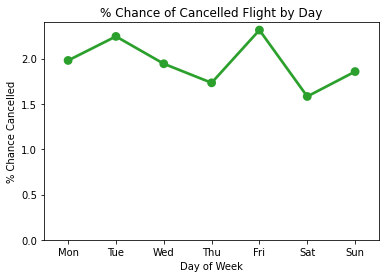

In [30]:
#Plot an adapted line plot to show variation in % chance cancelled across the week
base_color = sb.color_palette()[2]
width = 1
bins = np.arange(1, 8, width)
sb.pointplot(data = DOWCancel, x = 'DayOfWeek', y = 'Cancelled', color = base_color)
name_days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(np.arange(0,max(bins),width), name_days);
plt.ylim(0, 2.4)
plt.xlabel('Day of Week')
plt.ylabel('% Chance Cancelled')
plt.title('% Chance of Cancelled Flight by Day');

From the above bar plot we can see that an individual had a higher chance of having their flight cancelled in 2008 if it was scheduled on Friday or Tuesday as opposed to Saturdays where the chances of being Cancelled are less likely.Overall though, there's doesnt seem to be much variaiton across the week (1.5% - 2.3%).

In [31]:
# Calculate % chance flight cancellled by Month
MOYCancel = (flights.groupby('Month').Cancelled.mean()*100).reset_index()
MOYCancel.head(12)

,Month,Cancelled
0,1,2.857214
1,2,3.618183
2,3,2.626727
3,4,1.731241
4,5,1.027391
5,6,1.795898
6,7,1.687765
7,8,1.606294
8,9,1.832659
9,10,0.584137


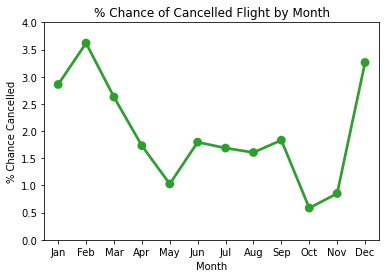

In [32]:
#Plot an adapted bar chart to show variation in % chance cancelled by month.
base_color = sb.color_palette()[2]
width = 1
bins = np.arange(0, 13, width)
sb.pointplot(data = MOYCancel, x = 'Month', y = 'Cancelled', color = base_color)
months_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(0,max(bins),width), months_names);
plt.ylim(0,4)
plt.xlabel('Month')
plt.ylabel('% Chance Cancelled')
plt.title('% Chance of Cancelled Flight by Month');

Flights scheduled in February or December are more likely to be cancelled than flights scheduled in October and November which are less likely to be cancelled. 

#### Flight Distance vs Time

While we've looked at the distribution of scheduled Flight duration and distance separately, I haven't explored the relationship between the two variables for Cancelled Flights.

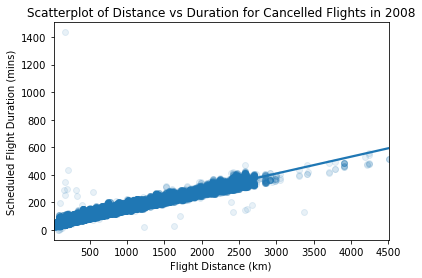

In [33]:
sb.regplot(data = Cancel, x = 'Distance', y = 'CRSElapsedTime', scatter_kws = {'alpha' :1/10});
plt.xlabel('Flight Distance (km)')
plt.ylabel('Scheduled Flight Duration (mins)')
plt.title('Scatterplot of Distance vs Duration for Cancelled Flights in 2008');

From the plot above, it seems clear that there are few Cancelled flights that cover distances greater than 3000 km or last longer than 500 minutes. Therefore I will focus on data that falls within these bounds.

In [34]:
Cancel2 = Cancel.loc[(Cancel['CRSElapsedTime']<=500) & (Cancel['Distance'] <= 3000)]

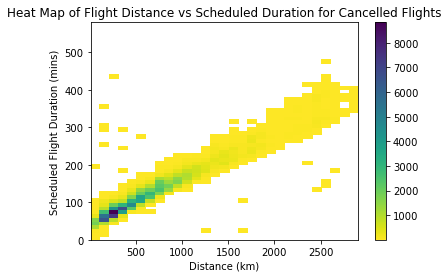

In [35]:
#Heat map of cancelled flights for Scheduled flight duration vs Distance
bins_x = np.arange(10, 2900+100, 100)
bins_y = np.arange(0, 490+100, 10)
plt.hist2d(data = Cancel2, x = 'Distance', y = 'CRSElapsedTime', cmin = 1, cmap = 'viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Distance (km)')
plt.ylabel('Scheduled Flight Duration (mins)')
plt.title('Heat Map of Flight Distance vs Scheduled Duration for Cancelled Flights');

From the heatmap above, I can see that there is a dense zone of cancelled flights on the lower end. I wish to examine that more closely.

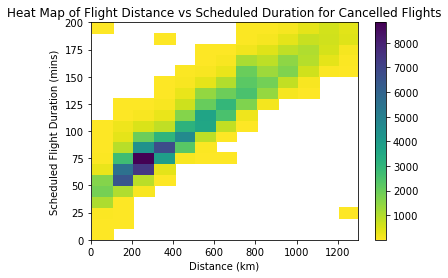

In [36]:
# Taking a closer look at concentration of Cancelled flights
bins_x = np.arange(10, 2900+100, 100)
bins_y = np.arange(0, 490+100, 10)
plt.hist2d(data = Cancel2, x = 'Distance', y = 'CRSElapsedTime', cmin = 1, cmap = 'viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.ylim(0,200)
plt.xlim(0,1300);
plt.xlabel('Distance (km)')
plt.ylabel('Scheduled Flight Duration (mins)')
plt.title('Heat Map of Flight Distance vs Scheduled Duration for Cancelled Flights');

From the heat map above, I can see that most Cancelled flights have distances between 100km and 400km but also with durations between 50 minutes and 100 mins.

In [37]:
#Create subset dataframe that contains highest concentration of cancelled flights
MostCancel = Cancel2.loc[(Cancel2['CRSElapsedTime'].between(50,100, inclusive =True)) &
                         (Cancel2['Distance'].between(100,400,inclusive=True))]

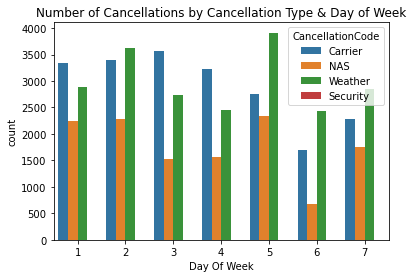

In [38]:
# Clustered Bar Chart of Cancellations by Cancellation Type
sb.countplot(data = MostCancel, x = 'DayOfWeek', hue = 'CancellationCode');
plt.xlabel('Day Of Week')
plt.ylabel('count')
plt.title('Number of Cancellations by Cancellation Type & Day of Week');


While some observations can be immediately drawn from this it may be better to facet this visualization

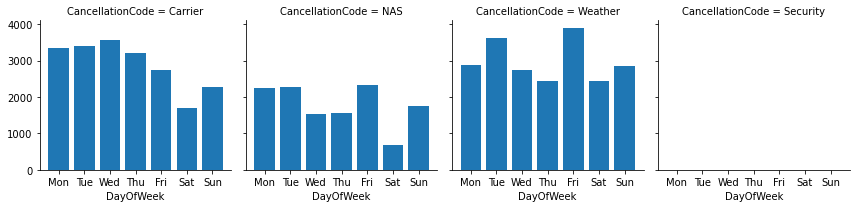

In [39]:
#Facet grid of Cancellations across week by Cancellation Code
width = 1
bins = np.arange(1, 9, width)
g = sb.FacetGrid(data = MostCancel, col = 'CancellationCode');
g.map (plt.hist, 'DayOfWeek', rwidth=.8, bins = bins);
name_days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(np.arange(1.5,max(bins),width), name_days);

From the above Facet Grid we can first see that Weather Cancellations account for the most in this subset of the data with Security Cancellations accounting for the least (too little to be seen with the given scale). Carrier Cancellations were peak on Wednesdays,NAS Cancellations and Weather Cancellations peak on Fridays. 

Similarly, we can compare the cancellation types across each day as seen below.

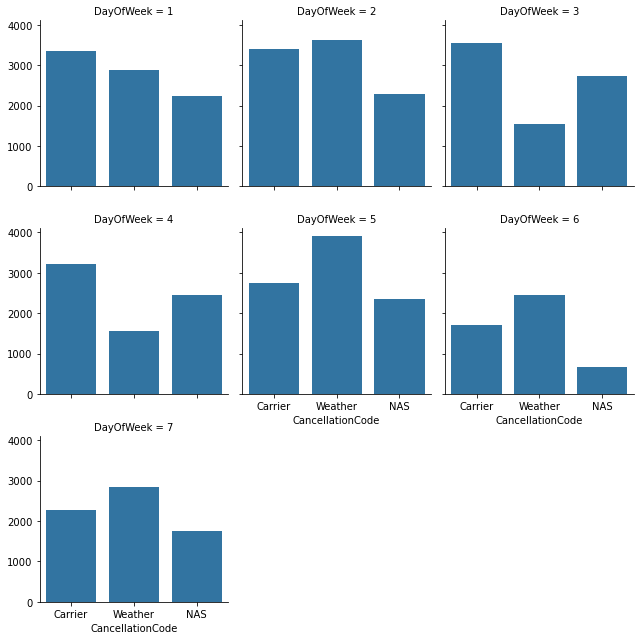

In [40]:
#Facet Grid of Cancellation Codes by Day of Week
g = sb.FacetGrid(data = MostCancel, col = 'DayOfWeek', col_wrap = 3, );
g.map(sb.countplot, 'CancellationCode', order = None);

From the above Facet Grid we can see that cancellations are caused by:

1). Weather  on Tuesdays Fridays, Saturdays and Sundays

2). Carrier on Mondays Wednedays & Thursdays

3). NAS Cancellations are always less than Weather & Carrier

4). Security Cancellations are the least and too few to be plotted


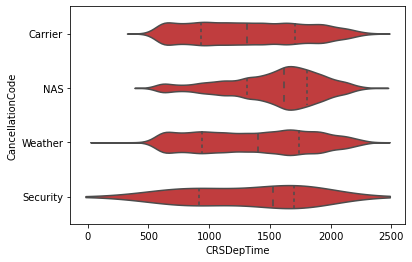

In [41]:
#Violin Plot of 
base_color = sb.color_palette()[3]
sb.violinplot(data= MostCancel, y='CancellationCode', x='CRSDepTime', color=base_color, inner = 'quartile');

From the above plot we can see that for most Cancelled flights, Carrier Cancellations have a median departure time of 1300 hrs (1:00pm), NAS Cancellation have a median of 1600 hrs (4pm), Weather Cancellations 1330hrs (130pm) and Security Cancellation a median of 1500hrs (3pm). Additionally, Weather and Security Cancellations occur across a broader range of Departure times than Carrier and NAS.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> For the plot of Distance vs CRSElapsedTime, it was interesting to see that most Cancelled flights have distances between 100km and 400km but also with durations between 50 minutes and 100 mins, slightly difference from the peaks registers when the distribution of cancelled flights were plotted for each variable individually. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

It was interesting to observe the difference in the statistical spread of Scheduled departure Time for different types of Cancelled Flights.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [42]:
# create a list of conditions for new column > Scheduled Departure Time of Day, "SchedDep_TOD"
conditions = [
    (MostCancel['CRSDepTime'] > 0) & (MostCancel['CRSDepTime'] <= 600),
    (MostCancel['CRSDepTime'] > 600) & (MostCancel['CRSDepTime'] <= 1200),
    (MostCancel['CRSDepTime'] > 1200) & (MostCancel['CRSDepTime'] <= 1800),
    (MostCancel['CRSDepTime'] > 1800) & (MostCancel['CRSDepTime'] <= 2400)
    ]

# create a list of the values we want to assign for each condition
values = ['Early_AM', 'Late_AM', 'Early_PM', 'Late_PM']

# create a new column and use np.select to assign values to it using our lists as arguments
MostCancel['SchedDep_TOD'] = np.select(conditions, values)

<ipython-input-42-498643b495fe>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MostCancel['SchedDep_TOD'] = np.select(conditions, values)


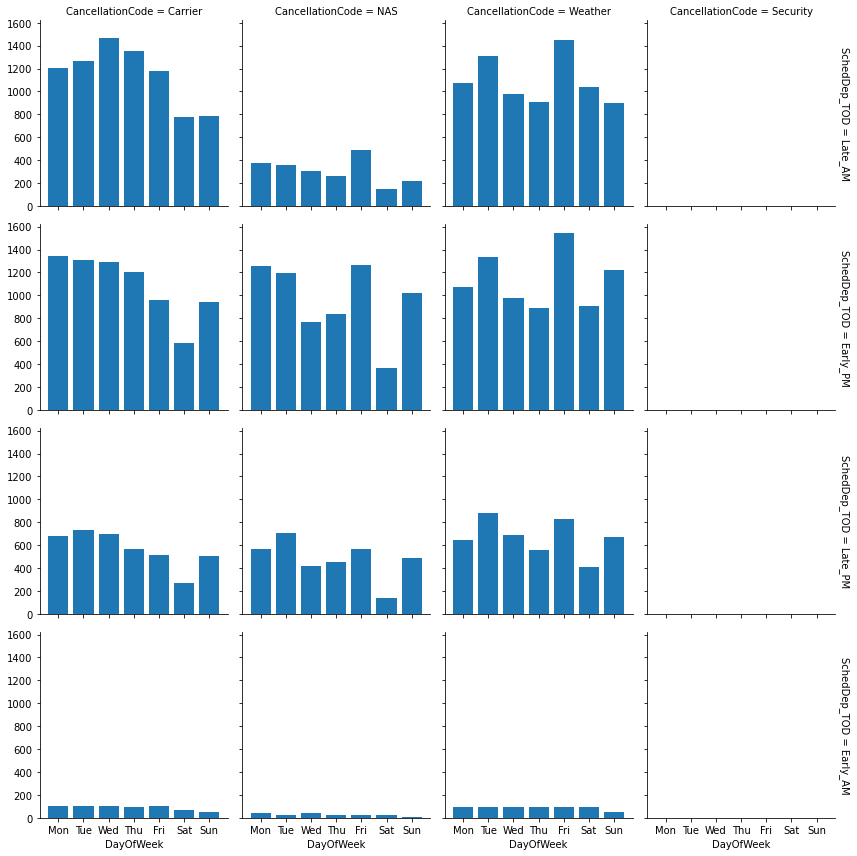

In [43]:
# Facet Grid Histograms of Cancellations across Days of Week, facetted according to Cancellation Type and Time of Dat
width = 1
bins = np.arange(1, 9, width)
g = sb.FacetGrid(data = MostCancel, col = 'CancellationCode', row = 'SchedDep_TOD', margin_titles = True);
g.map (plt.hist, 'DayOfWeek', rwidth=.8, bins = bins);
name_days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(np.arange(1.5,max(bins),width), name_days);

Above we can see that the least cancellations of any type happen in the Early AM (1200am to 6am)  followed by the Late PM. There are also too few Security Cancellations to be plotted.
Most cancellations seem to occur in the Late AM or Early PM (6am - 6pm).

There are very vew NAS Cancellations in the Late AM when compared to Weather and Carrier cancellations. 
Weather cancellations appear to be consistently higher on Tuesdays and Fridays irrespectives of the time of day. 
Carrier cancellations also appear to be higher in the early half of the week, despite the time of day. 


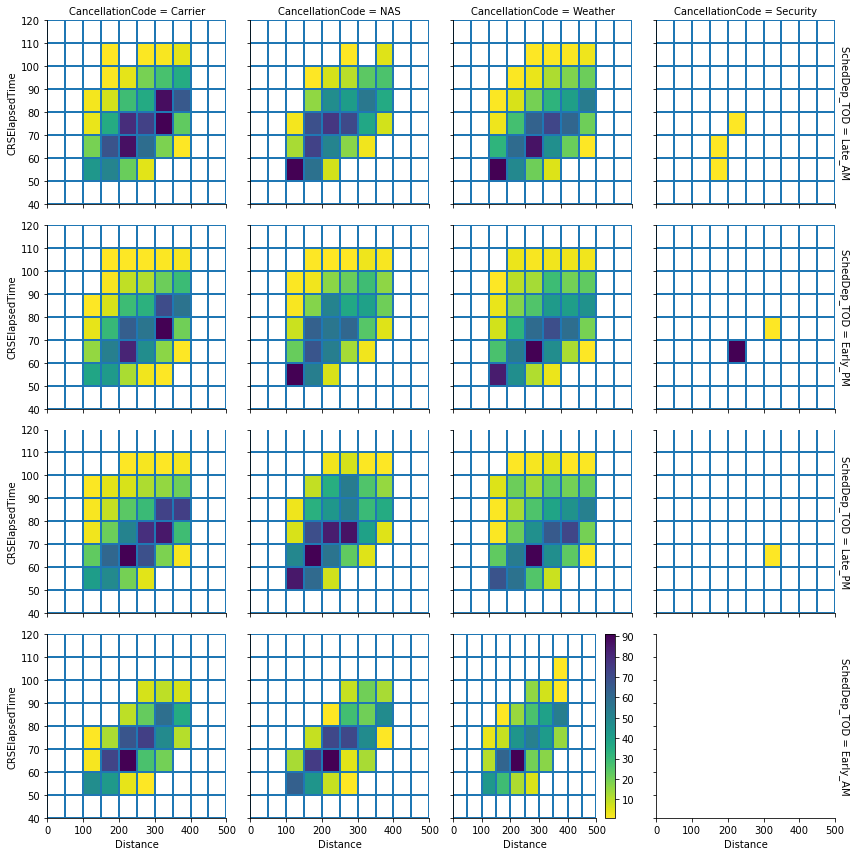

In [49]:
bins_x = np.arange(0, 500+50, 50)
bins_y = np.arange(40, 120+10, 10)
g = sb.FacetGrid(data = MostCancel, col = 'CancellationCode', row = 'SchedDep_TOD', margin_titles = True);
g.map (plt.hist2d, 'Distance', 'CRSElapsedTime', cmin = 1, cmap = 'viridis_r', bins = [bins_x, bins_y]);
plt.colorbar();

From the faceted heat maps above, I can deduce the following

Most Flights cancelled due to Carrier Cancellations usually cover distances of 200 - 400 km with durations of 60 - 90 minutes despite time of day. 

Most NAS Cancelled flights cover distances of 100 - 300 km with durations of 50 - 90 mins despite time of day. 

For for Weather related Cancellations, depsite the time of day, these flights typically cover distances of 200 - 250 km with a duration of 60-70 mins

Security related Cancellations do not occure in the Early AM but have a high frequency of occuring in the Early PM especially for flights with a duration of 60-70 mins and distances of 200-250km.




### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> It was interesting to see how the Facetted heat map was able to discern the characteristics of Cancelled flights based on Distance, Duration, Depature Time of Day and Cancellation type. It assists in greatly narrowing down, WHEN flights were likely to be Cancelled in 2008 and their typical durations & distances covered. 

### Were there any interesting or surprising interactions between features?

> It was interesting to see that while there were too few Security cancellations to be plotted in the Facetted Bar Chart, in the heat map, I was able to see th details on flight duration, distance and time of day that most security cancellations occur.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!